In [1]:
# Import libraries
import moments, moments.LD
import pandas as pd, numpy as np
import demes, demesdraw, matplotlib.pylab as plt

In [2]:
# Plotting function
def plot_D(sigma,rhos,sample_times,subfig,ancestral):
     (ax1, ax2, ax3) = subfig.subplots(nrows=1, ncols=3)
     #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

     ax1.plot(rhos, sigma.LD()[:, 0],label=str("tp_"+str(sample_times[0])))
     ax1.plot(rhos, sigma.LD()[:, 3],label=str("tp_"+str(sample_times[1])))
     ax1.plot(rhos, sigma.LD()[:, 5],label=str("tp_"+str(sample_times[2])))
     ax1.plot(rhos, ancestral.LD()[:, 0],'--',label="Ancestral")

     ax2.plot(rhos, sigma.LD()[:, 6],label=str(sigma.names()[0][6])+"_tp_"+str(sample_times[0]))
     ax2.plot(rhos, sigma.LD()[:, 15],label=str(sigma.names()[0][15])+"_tp_"+str(sample_times[1]))
     ax2.plot(rhos, sigma.LD()[:, 23],label=str(sigma.names()[0][23])+"_tp_"+str(sample_times[2]))
     ax2.plot(rhos, ancestral.LD()[:, 1],'--',label="Ancestral")

     ax3.plot(rhos, sigma.LD()[:, 24],label=str(sigma.names()[0][24])+"_tp_"+str(sample_times[0]))
     ax3.plot(rhos, sigma.LD()[:, 39],label=str(sigma.names()[0][39])+"_tp_"+str(sample_times[1]))
     ax3.plot(rhos, sigma.LD()[:, 44],label=str(sigma.names()[0][44])+"_tp_"+str(sample_times[2]))
     ax3.plot(rhos, ancestral.LD()[:, 2],'--',label="Ancestral")

     ax1.set_yscale("log")
     ax2.set_yscale("log")
     ax3.set_yscale("log")
     ax1.set_xscale("log")
     ax2.set_xscale("log")
     ax3.set_xscale("log")
     ax1.set_xlabel(r"$\rho$")
     ax2.set_xlabel(r"$\rho$")
     ax3.set_xlabel(r"$\rho$")
     ax1.set_ylabel(r"$\sigma_d^2$")
     ax2.set_ylabel(r"$\sigma_{Dz}$")
     ax3.set_ylabel(r"Pi2")
     ax1.legend()
     #ax2.legend()
     ax3.legend()

In [3]:
# Specify DEMES Model parameters
N = 10e3 # Ancestral pop will have an N of N*populations
splits = 2 # How many split events after merging
factor = 3 # splits into populations 

time_period = 0.1*N

events = splits*2+1
current_time = events*time_period

# set up recombination rates
rhos = np.logspace(-2, 2, 21)

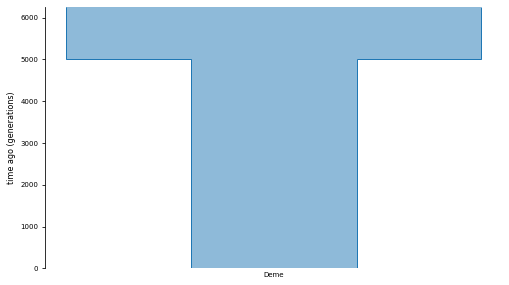

In [4]:
# Create model of bottleneck

# Create Builder
m = demes.Builder()

# Add deme with 2 epochs, one after a bottleneck 
m.add_deme("Deme",epochs=[dict(start_size=factor*N,end_time=current_time),dict(start_size=factor*N*0.4,end_time=0)])
# Resolve model
graph = m.resolve()

# Check demographic events
graph.discrete_demographic_events()

ax = demesdraw.tubes(graph, log_time=False, num_lines_per_migration=3)

In [9]:
?moments.LD.Inference.sigmaD2

Signature: moments.LD.Inference.sigmaD2(y, normalization=0)
Docstring:
Compute the :math:`\sigma_D^2` statistics normalizing by the heterozygosities
in a given population.

:param y: The input data.
:type y: :class:`LDstats` object
:param normalization: The index of the normalizing population
    (normalized by pi2_i_i_i_i and H_i_i), default set to 0.
:type normalization: int, optional
File:      ~/projects/ctb-sgravel/python_environments/moments/lib/python3.8/site-packages/moments/LD/Inference.py
Type:      function


In [7]:
# Specify sampling parameters
times = [1,3000,4999]
ds = ['Deme','Deme','Deme']

# Compute LD in ancestral pop
Ancestral = moments.Demes.LD(graph, sampled_demes=["Deme"], sample_times=[6000],rho = rhos)
ancestrals = moments.LD.Inference.sigmaD2(Ancestral)

# compute LD stats at 3 different time points - starting most recent
Ds1 = moments.Demes.LD(graph, sampled_demes=ds, sample_times=times,rho = rhos)
sigma1 = moments.LD.Inference.sigmaD2(Ds1)

# compute LD stats at 3 different time points - starting from most ancient
Ds2 = moments.Demes.LD(graph, sampled_demes=ds, sample_times=np.flip(times),rho = rhos)
sigma2 = moments.LD.Inference.sigmaD2(Ds2)

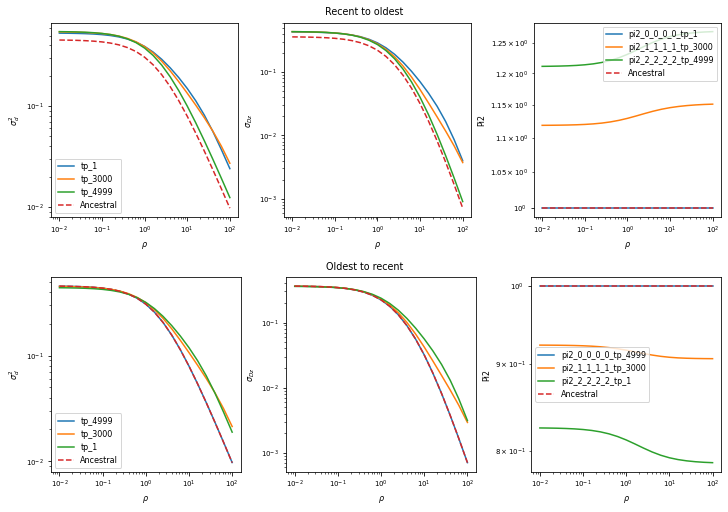

In [8]:
fig = plt.figure(constrained_layout=True, figsize = (10,7))
subfigs = fig.subfigures(nrows=2, ncols=1)

# subfigs[0].suptitle("Ancestral pop")
# plot_D(Ancestral,rhos,'',subfigs[0],Ancestral)

subfigs[0].suptitle("Recent to oldest")
plot_D(sigma1,rhos,times,subfigs[0],ancestrals)

subfigs[1].suptitle("Oldest to recent")
plot_D(sigma2,rhos,np.flip(times),subfigs[1],ancestrals)